In [1]:
## Dataset Link
### https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
path = '../All_data_sets/practice/IMDB_Dataset.csv'

df = pd.read_csv( path )

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### toatl number of records in the dataset

In [4]:
df.shape

(50000, 2)

## Distribution of the sentiment

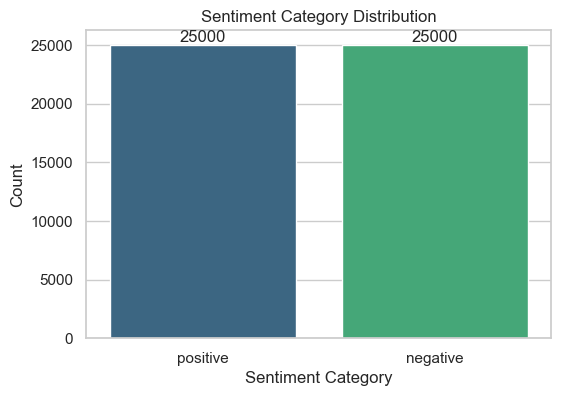

In [5]:
plt.figure(figsize=(6,4))

sns.set(style="whitegrid")

ax = sns.countplot(data=df, x='sentiment', palette='viridis')

plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  # X-coordinate (center of bar)
        height + 0.5,                    # Y-coordinate (slightly above bar)
        int(height),                     # Text (count)
        ha='center',                     # Horizontal alignment
        va='bottom'                      # Vertical alignment
    )

plt.show()

In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

## No null values are present

## Text preprocessing 

In [7]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [8]:
stop_words = stopwords.words('english')
stop_words = set( stop_words )
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [9]:
len( stop_words )

198

In [10]:
### These words are required in the samples
required_words = ["you", "i", "we", "me", "us", "they", "them", "what", "how", "why", "not", "no"]

for word in required_words:
    stop_words.discard( word )

In [11]:
len( stop_words )

187

In [12]:
lemmatizer = WordNetLemmatizer()

In [13]:
def text_preprocessing(sentence: str) -> str:

    sentence = sentence.lower()

    sentence = (
        sentence.replace("n't", " not")
                .replace("'m", " am")
                .replace("'re", " are")
                .replace("'s", " is")
                .replace("'ll", " will")
                .replace("'ve", " have")
                .replace("'d", " would")
    )

    # Remove URLs and emails
    # sentence = re.sub(r'http\S+|www\S+|https\S+', '', sentence)
    sentence = re.sub(r'http\S+|www\S+|https\S+|[\w\.-]+@[\w\.-]+', '', sentence)

    # removing html tags
    sentence = re.sub(r'<.*?>', ' ', sentence)

    # Replace punctuation 
    sentence = re.sub(r'[^a-z\s]', ' ', sentence)

    # Tokenize
    tokens = word_tokenize(sentence)

    # Remove stopwords and empty tokens
    cleaned = [word.strip() for word in tokens if word and word not in stop_words]

    # Lemmatize
    lemmatized = [lemmatizer.lemmatize(word, pos="v") for word in cleaned]

    # Join back
    return " ".join(lemmatized)

### Total words in the review

In [14]:
# Checking the length of the all reviews combined
# print(np.sum([len(word_tokenize(d))for d in df["review"]]))

In [15]:
from datetime import datetime

In [16]:
start = datetime.now()

In [17]:
start

datetime.datetime(2025, 10, 21, 11, 53, 33, 960042)

In [18]:
# df['cleaned_review'] = df['review'].apply( text_preprocessing )

In [19]:
end = datetime.now()

In [20]:
end - start 

datetime.timedelta(microseconds=40938)

### Total words after cleaning

In [21]:
# Checking the length of the all reviews combined after processing the data

# print(np.sum([len(word_tokenize(d))for d in df["cleaned_review"]]))

In [22]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### save the cleaned dataset

In [23]:
# df.to_csv(os.path.join( '../All_data_sets/practice' , 'cleaned_movie_reviews.csv' ), index=False)

In [24]:
df = pd.read_csv( os.path.join( '../All_data_sets/practice' , 'cleaned_movie_reviews.csv' )  )

In [25]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mention watch oz episode you hoo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production film technique una...
2,I thought this was a wonderful way to spend ti...,positive,i think wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stun fi...


In [26]:
df.drop(columns=['review'] , inplace=True)

In [27]:
df.head()

,sentiment,cleaned_review
0,positive,one reviewers mention watch oz episode you hoo...
1,positive,wonderful little production film technique una...
2,positive,i think wonderful way spend time hot summer we...
3,negative,basically family little boy jake think zombie ...
4,positive,petter mattei love time money visually stun fi...


### split the text into train and test

In [28]:
X = df["cleaned_review"]
y = df["sentiment"]

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( X, y, test_size= 0.3, random_state= 1)

In [30]:
# Performing the sentence embedding
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [31]:
x_train_transformed = vectorizer.fit_transform(x_train)
x_test_transformed = vectorizer.transform(x_test)

In [32]:
x_train_transformed

<35000x74974 sparse matrix of type '<class 'numpy.float64'>'
	with 3420610 stored elements in Compressed Sparse Row format>

In [33]:
x_test_transformed

<15000x74974 sparse matrix of type '<class 'numpy.float64'>'
	with 1436971 stored elements in Compressed Sparse Row format>

### Model Training

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [35]:
start = datetime.now()

In [36]:
model.fit(x_train_transformed, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [37]:
end = datetime.now()

In [38]:
end-start

datetime.timedelta(microseconds=969009)

In [39]:
y_train_pred = model.predict(x_train_transformed)
y_test_pred = model.predict(x_test_transformed)

# Evaluating model's performance

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
### training report

print(f'Accuracy of the training data:{accuracy_score(y_train, y_train_pred)}')
print(f'Confusion matrix is:{confusion_matrix(y_train, y_train_pred)}')
print(f'Classification report:\n{classification_report( y_train, y_train_pred )}')

Accuracy of the training data:0.9308571428571428
Confusion matrix is:[[16126  1353]
 [ 1067 16454]]
Classification report:
              precision    recall  f1-score   support

    negative       0.94      0.92      0.93     17479
    positive       0.92      0.94      0.93     17521

    accuracy                           0.93     35000
   macro avg       0.93      0.93      0.93     35000
weighted avg       0.93      0.93      0.93     35000



In [42]:
### testing report

print(f'Accuracy of the training data:{accuracy_score(y_test, y_test_pred)}')
print(f'Confusion matrix is:{confusion_matrix(y_test, y_test_pred)}')
print(f'Classification report:\n{classification_report( y_test, y_test_pred )}')

Accuracy of the training data:0.8951333333333333
Confusion matrix is:[[6602  919]
 [ 654 6825]]
Classification report:
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      7521
    positive       0.88      0.91      0.90      7479

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



In [43]:
new_text1 = "The movie was very bad, didn't like at all"
new_text = text_preprocessing(new_text1)
new_text = vectorizer.transform([new_text])
new_rev = model.predict(new_text)
print(f"{new_text1}: \t{new_rev[0].capitalize()}")

The movie was very bad, didn't like at all: 	Negative


In [44]:
new_text1 = "The movie was fantastic, loved it"
new_text = text_preprocessing(new_text1)
new_text = vectorizer.transform([new_text])
new_rev = model.predict(new_text)
print(f"{new_text1}: \t{new_rev[0].capitalize()}")

The movie was fantastic, loved it: 	Positive


In [45]:
new_text1 = "Very boring"
new_text = text_preprocessing(new_text1)
new_text = vectorizer.transform([new_text])
new_rev = model.predict(new_text)
print(f"{new_text1}: \t{new_rev[0].capitalize()}")

Very boring: 	Negative


In [46]:
new_text1 = "The best movie I have ever seen"
new_text = text_preprocessing(new_text1)
new_text = vectorizer.transform([new_text])
new_rev = model.predict(new_text)
print(f"{new_text1}: \t{new_rev[0].capitalize()}")

The best movie I have ever seen: 	Positive
